<a href="https://colab.research.google.com/github/N00B-MA5TER/ML-Projects/blob/main/Plant_Disease_Prediction_CNN_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Seeding for reproducibility**

In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

Upload the kaggle.json file

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentials = json.load(open("kaggle.json"))

In [ ]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.03G/2.04G [00:13<00:00, 248MB/s]
100% 2.04G/2.04G [00:15<00:00, 137MB/s]


In [ ]:
!ls

apple_black_rot.jpeg  plantvillage-dataset.zip	  test_potato_early_blight.jpg
apple_rust.jpeg       sample_data
kaggle.json	      test_blueberry_healthy.jpg


In [ ]:
# Unzip the downloaded dataset
with ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
!ls

 apple_black_rot.jpeg  'plantvillage dataset'	   test_blueberry_healthy.jpg
 apple_rust.jpeg        plantvillage-dataset.zip   test_potato_early_blight.jpg
 kaggle.json	        sample_data


In [ ]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'color', 'segmented']
38
['Apple___Apple_scab', 'Potato___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Potato___Late_blight']
38
['Apple___Apple_scab', 'Potato___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Potato___Late_blight']
38
['Apple___Apple_scab', 'Potato___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Potato___Late_blight']


**Number of Classes = 38**

In [ ]:
print(len(os.listdir("plantvillage dataset/color/Potato___healthy")))
print(os.listdir("plantvillage dataset/color/Potato___healthy")[:5])

152
['f5bd2732-197b-4d8e-bb50-a4966dc416f5___RS_HL 1840.JPG', '1a1184f8-c414-4ead-a4c4-41ae78e29a82___RS_HL 1971.JPG', '3edf7c3f-73e0-439c-870d-76cfd7c3bc45___RS_HL 1859.JPG', '7e7b6ab4-9adb-4a3b-abfb-8716b0039879___RS_HL 1921.JPG', '3f369e63-81eb-4194-a145-df9ed91abc5d___RS_HL 1745.JPG']


**Data Preprocessing**

In [ ]:
# Dataset Path
base_dir = "plantvillage dataset/color"

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

# Read the image
img = mpimg.imread(image_path)
print(img)

[[[167 163 196]
  [166 162 195]
  [165 161 194]
  ...
  [185 182 211]
  [183 180 209]
  [181 178 207]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [186 183 212]
  [184 181 210]
  [183 180 209]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [188 185 214]
  [186 183 212]
  [185 182 211]]

 ...

 [[100  90 124]
  [102  92 126]
  [104  94 128]
  ...
  [126 110 137]
  [126 110 137]
  [126 110 137]]

 [[101  91 125]
  [102  92 126]
  [103  93 127]
  ...
  [122 106 133]
  [123 107 134]
  [123 107 134]]

 [[104  94 128]
  [103  93 127]
  [102  92 126]
  ...
  [121 105 132]
  [122 106 133]
  [123 107 134]]]


(256, 256, 3)


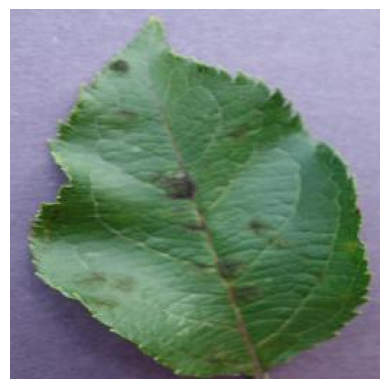

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

# Read the image
img = mpimg.imread(image_path)
print(img.shape)

# Display the image
plt.imshow(img)
plt.axis('off') # turn off axis numbers
plt.show()

In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2 # Use 20% of data for validation
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


**Convolutional Neural Network**

In [ ]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model Training**

In [ ]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size, # Number of steps per epoch
    epochs = 5, # Number of epochs
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size # Validation steps
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 96s 66ms/step - accuracy: 0.6028 - loss: 1.6258 - val_accuracy: 0.8668 - val_loss: 0.4321
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 84s 62ms/step - accuracy: 0.9180 - loss: 0.2603 - val_accuracy: 0.8580 - val_loss: 0.4313
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 144s 64ms/step - accuracy: 0.9659 - loss: 0.1077 - val_accuracy: 0.8534 - val_loss: 0.5423
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 143s 64ms/step - accuracy: 0.9770 - loss: 0.0723 - val_accuracy: 0.8838 - val_loss: 0.5019
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 139s 62ms/step - accuracy: 0.9842 - loss: 0.0509 - val_accuracy: 0.8670 - val_loss: 0.6022


**Model Evaluation**

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps = validation_generator.samples // batch_size)
print(f"Validation Accuracy : {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8677 - loss: 0.6104
Validation Accuracy : 86.71%


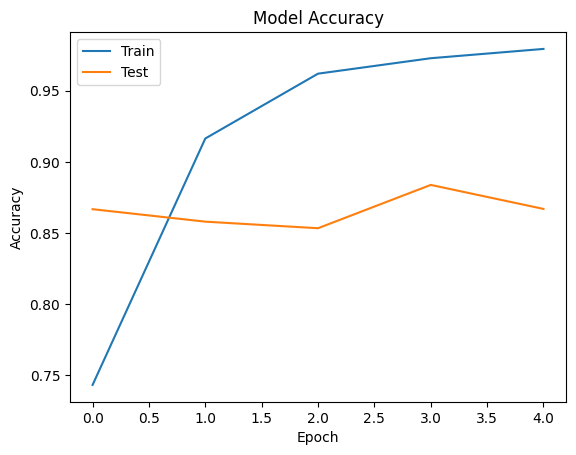

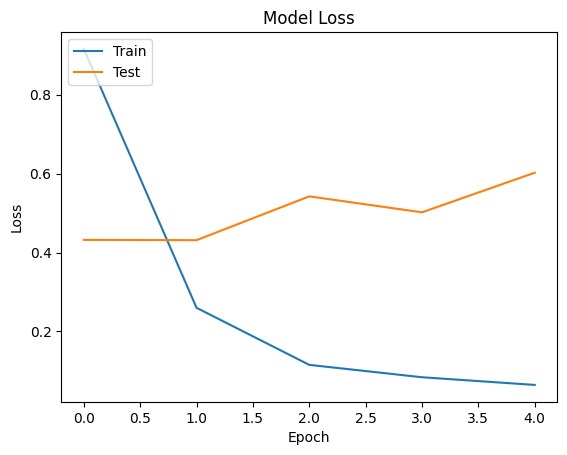

In [ ]:
# Plot training & Validation Accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & Validation Loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [ ]:
# Function to load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
  # Load the image
  img = Image.open(image_path)
  # Resize the image
  img = img.resize(target_size)
  # Convert the image to a numpy array
  img_array = np.array(img)
  # Add batch dimension
  img_array = np.expand_dims(img_array, axis=0)
  # Scale the image values to [0, 1]
  img_array = img_array.astype('float32') / 255.
  return img_array

# Function to Predict the class of an image
def predict_image_class(model, image_path, class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions, axis=1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
#image_path = '/content/apple_black_rot.jpeg'
#image_path = '/content/apple_rust.jpeg'
image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class Name: Corn_(maize)___Common_rust_


**Save the model to google drive or local**

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/trained_models/plant_disease_prediction_model.h5')